PREGUNTA 3: 8 (PUNTOS):PRIMER INTENTO
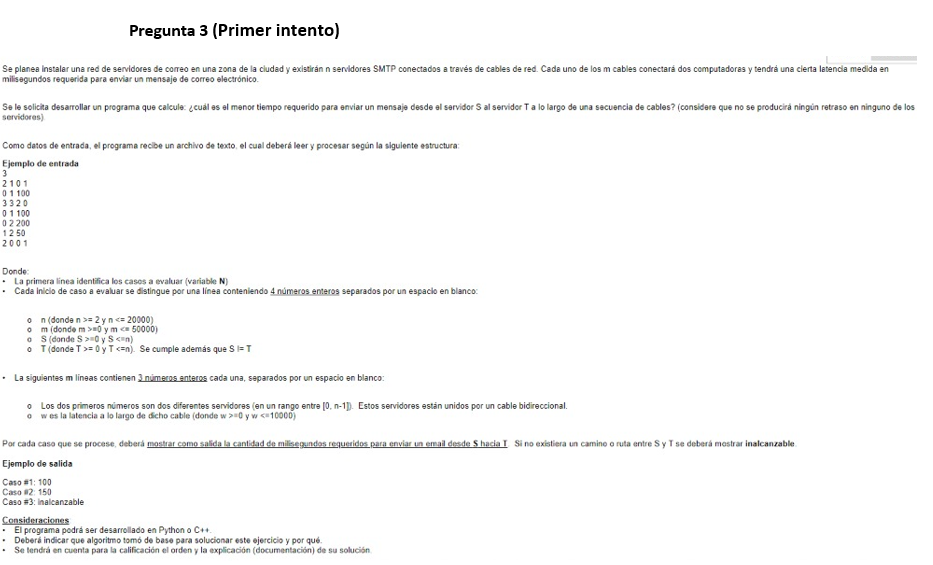

In [ ]:
%%writefile data.csv
3
2 1 0 1
0 1 100
3 3 2 0
0 1 100
0 2 200
1 2 50
2 0 0 1

In [ ]:
import heapq as hq
import numpy as np
import graphviz as gv
import math

In [ ]:
def dijkstra(G, s):
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[s] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[u] = True
      for v, w in G[u]:
        if not visited[v]:
          f = g + w
          if f < cost[v]:
            cost[v] = f
            path[v] = u
            hq.heappush(pqueue, (f, v))

  return path, cost

In [ ]:
arr_str = [[],[[]]]
cases = None
actual = 0
current = 0
with open('data.csv', 'r') as text:
  for line in text:
    dataline = list(map(lambda c: int(c), line.split()))
    if(len(dataline) == 1):
     cases = dataline[0]
    elif(len(dataline) == 4):
      arr_str[0].append(dataline)
    elif(len(dataline) == 3):
      current = dataline[0]
      if actual != current:
        actual = current
        arr_str[1].append([])
      arr_str[1][current].append(tuple(dataline[1:]))
  if(len(arr_str[1]) < cases):
    for i in range(cases - len(arr_str[1])):
      arr_str[1].append([]) 


print(cases)
print(arr_str)

In [ ]:
def drawG_al(G, directed=False, weighted=False, path=[], layout="sfdp"):
  graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  graph.graph_attr["layout"] = layout
  graph.edge_attr["color"] = "gray"
  graph.node_attr["color"] = "orangered"
  graph.node_attr["width"] = "0.1"
  graph.node_attr["height"] = "0.1"
  graph.node_attr["fontsize"] = "8"
  graph.node_attr["fontcolor"] = "mediumslateblue"
  graph.node_attr["fontname"] = "monospace"
  graph.edge_attr["fontsize"] = "8"
  graph.edge_attr["fontname"] = "monospace"
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        graph.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        graph.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v, w in G[u]:
      draw = False
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        draw = True
      elif directed:
        draw = True
      if draw:
        if weighted:
          graph.edge(str(u), str(v), str(w))
        else:
          graph.edge(str(u), str(v))
  return graph

In [ ]:
print(arr_str[1])
print(len(arr_str[1]))
drawG_al(arr_str[1], weighted=True)


In [ ]:
for enum, arr in enumerate(arr_str[0]):
  path, cost = dijkstra(arr_str[1], enum)
  print("Caso",enum, ":", cost[arr[len(arr)-1]])

Para solucionar este problema se utilizó el algoritmo dijktra que permitió desarrollar de una forma efectiva al momento de realizar los pesos. 